In [13]:
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import os
nlp = spacy.load("en_core_web_sm",disable=["ner", "parser"])

Pre procesamiento

In [2]:
def limpieza(textos):
    resultados = []
    # Convertir todo a minúsculas antes de procesar
    textos = [texto.lower() for texto in textos]
    # Procesar con spacy
    for doc in nlp.pipe(textos, batch_size=1000):
        #Conservar solo la lematizacion de tokens alfabéticos y no stopwords, 
        palabras = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token.lemma_) >1]
        resultados.append(palabras)
    return resultados

In [3]:
def word_count(limpiar_textos, labels):
    # Separar textos por label
    falsas = []
    verdaderas = []

    for palabras, label in zip(limpiar_textos, labels):
        if label == 0:
            falsas.extend(palabras)
        else:
            verdaderas.extend(palabras)

    # Contar frecuencia
    count_falsas = Counter(falsas)
    count_verdaderas = Counter(verdaderas)

    palabra_mas_falsa = count_falsas.most_common(1)[0]
    palabra_mas_verdadera = count_verdaderas.most_common(1)[0]
    return falsas, verdaderas, palabra_mas_falsa, palabra_mas_verdadera

In [14]:
def generar_nube(palabras, titulo):
    texto = " ".join(palabras)
    nube = WordCloud(width=800,height=400,background_color='white',collocations=False).generate(texto)
    
    carpeta = '../Resultados'
    os.makedirs(carpeta, exist_ok=True)

    # Guardar la imagen
    ruta_archivo = os.path.join(carpeta, f"{titulo}.png")
    nube.to_file(ruta_archivo)
    
    # Guardar la imagen en la carpeta
    ruta_archivo = os.path.join('../Resultados', f"{titulo}.png")
    nube.to_file(ruta_archivo)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

In [6]:
data = pd.read_csv('../data/news_dataset.zip', compression='zip') 
data.head()

,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0


In [7]:
#Buscar nulos y duplicados 
print("Nulos:\n",data.isnull().sum())
print("Duplicados: ",data.duplicated().sum())

#Eliminar duplicados 
data.drop_duplicates(inplace=True) 
print("Duplicados: ",data.duplicated().sum())

Nulos:
 text     0
label    0
dtype: int64
Duplicados:  6251
Duplicados:  0


In [8]:
#Procesar en chunks 
chunk_size = 5000  # Cambia según tu RAM
textos = list(data['text'])
limpiar_textos = []
    
print("Procesando textos en chunks")
for i in range(0, len(textos), chunk_size):
    chunk = textos[i:i+chunk_size]
    limpiar_chunk = limpieza(chunk)
    limpiar_textos.extend(limpiar_chunk)
#Aplicar limpieza
print(limpiar_textos[:5])

Procesando textos en chunks
[['donald', 'trump', 'white', 'house', 'chaos', 'try', 'cover', 'russia', 'problem', 'mount', 'hour', 'refuse', 'acknowledge', 'problem', 'surround', 'fake', 'news', 'hoax', 'fact', 'bear', 'thing', 'differently', 'crack', 'congressional', 'public', 'grassley', 'iowa', 'head', 'senate', 'judiciary', 'committee', 'feed', 'demand', 'donald', 'trump', 'jr', 'trump', 'campaign', 'manager', 'paul', 'manafort', 'testify', 'committee', 'infamous', 'shady', 'meeting', 'donald', 'trump', 'shady', 'russian', 'lawyer', 'promise', 'dirt', 'democratic', 'presidential', 'nominee', 'hillary', 'clinton', 'fact', 'information', 'demand', 'send', 'signal', 'team', 'trump', 'notably', 'fire', 'special', 'counsel', 'robert', 'mueller', 'circumstance', 'despite', 'fact', 'trump', 'white', 'house', 'lay', 'groundwork', 'speak', 'tweet', 'grassley', 'warning', 'think', 'senator', 'grassley', 'rest', 'senate', 'need', 'look', 'warning', 'give', 'trump', 'jr', 'manafort', 'follow', 

In [9]:
labels = list(data['label'])
falsas, verdaderas, palabra_falsa, palabra_verdadera = word_count(limpiar_textos, labels)

print(f"La palabra que más se repite en noticias falsas es: {palabra_falsa[0]} ({palabra_falsa[1]} veces)")
print(f"La palabra que más se repite en noticias verdaderas es: {palabra_verdadera[0]} ({palabra_verdadera[1]} veces)") 

La palabra que más se repite en noticias falsas es: trump (65016 veces)
La palabra que más se repite en noticias verdaderas es: say (106815 veces)


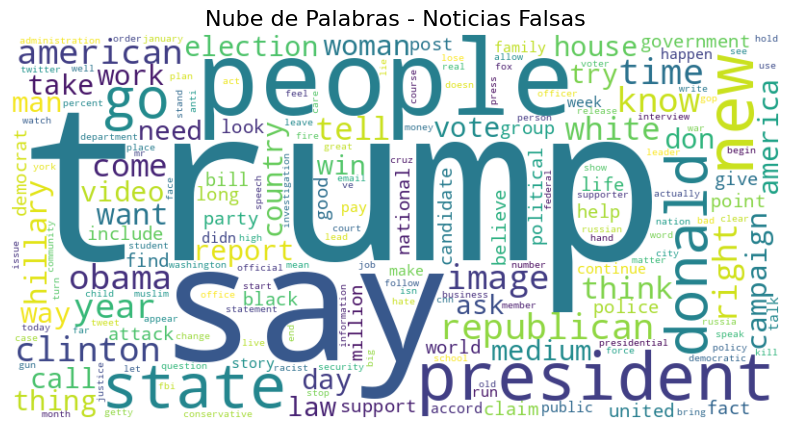

In [15]:
generar_nube(falsas, "Nube de Palabras - Noticias Falsas")

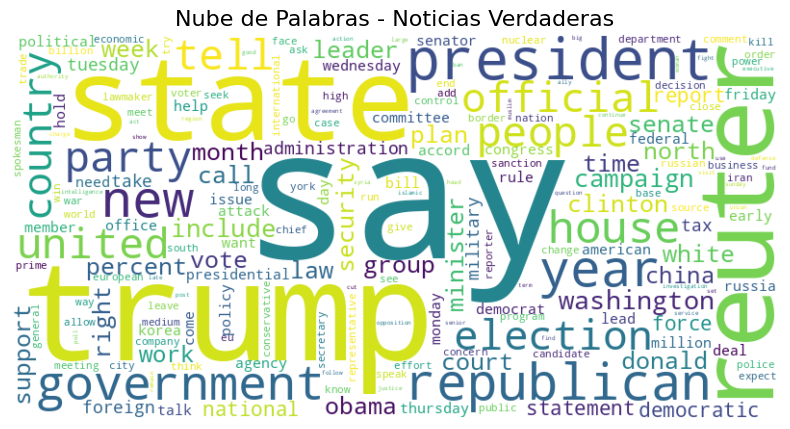

In [16]:
generar_nube(verdaderas, "Nube de Palabras - Noticias Verdaderas")